# Exploring Finance Data

This data project focuses on exploratory data analysis of stock prices. The focus is on bank stocks and to see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.
____

**NOTE: This project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice. **
____

## Getting the Data

Using pandas to directly read data from Yahoo finance using pandas!

----

**Required Packages: [pandas-datareader](https://github.com/pydata/pandas-datareader).**

Pandas datareader allow to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html).

----

### The Imports

In [32]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Data

The data from the following financial institution is explored.

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**To target the financial crisis, the data retreived is from Jan 1st 2006 to Jan 1st 2016 for each of these banks.**

### A few steps to setup the data

1. Use datetime to set start and end datetime objects.
2. From the documentation, its se clear the ticker for each bank is 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'.
3. Following the examples in documentation, it is clear that the data can be retreived by using the following syntax.

        # Example for Bank of America
        BAC = data.DataReader("BAC", 'source', start=start_date, end=end_date)
    
[Documentation Link](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

### Setting up dates using datetime module

In [33]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

### Retreiveing Data from all the listed bank above

In [35]:
# Bank of America
BAC = data.DataReader("GE", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

### Alternate for grabbing data togather

```python

    # Data can also be retreived for a list object
    df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
    
```

**Creating a list of the ticker symbols (as strings) in alphabetical order for easy reference down the line.**

In [36]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### Combing all the individual dataframes into a single dataframe.

The concat method from pandas, `pd.concat` is used to concatenate the bank dataframes together into a single data frame called bank_stocks here. Set the keys argument equal to the tickers list. The dataframes are conactenated as columns by setting argument `axis=1`.

In [37]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

Setting the column name levels. This will make it easier to differentiate the data of different banks.

In [38]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Checking the head of the bank_stocks dataframe to see how the data looks and if concatenation is done as desired.

In [39]:
bank_stocks.head()

Bank Ticker         BAC                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2006-01-03   272.307678  267.692322  270.000000  272.076935  4318756.0   
2006-01-04   272.307678  270.000000  271.923065  271.692322  3122223.0   
2006-01-05   271.923065  270.000000  271.307678  271.000000  2451501.0   
2006-01-06   273.307678  270.692322  272.153839  272.846161  2870920.0   
2006-01-09   272.538452  271.076935  272.307678  272.153839  2693080.0   

Bank Ticker                       C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03   167.646988  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   167.410049  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   166.983444  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   168.120956  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   167.694382  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  33.464500  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  33.487453  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  33.579285  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  33.613728  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  33.969540  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.353481  
2006-01-04   31.799999  31.530001  10870000.0  20.117414  
2006-01-05   31.500000  31.495001  10158000.0  20.095085  
2006-01-06   31.580000  31.680000   8403800.0  20.213112  
2006-01-09   31.674999  31.674999   5619600.0  20.209921  

[5 rows x 36 columns]

Before continuing to explore that data, it is necessary to get familiar with the following pandas functionality

- **Mulilevel Indexing**: Refere to the documentation on [Multi-Level Indexing here](http://pandas.pydata.org/pandas-docs/stable/advanced.html)

- Slicing (Getting corss sections of the dataframe): [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

## Exploratory Data Analysis

### Asking some basic question.
**What is the max Close price for each bank's stock throughout the time period?**

In [40]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC    324.000000
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**What are the returns of each bank's stock?**

Creating a new dataframe to contain the returns for each bank's stock.

Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

The pandas method `pct_change()`can be used on the Close column to create a column representing this return value. Creating a for loop that loopes through each Bank Stock Ticker such that it creates the returns column for each back makes things faster.

In [42]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.001414,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,-0.002548,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,0.006812,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,-0.002537,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Getting the overview of which stock stands out why should infer further steps**

This can be done by creating a `pairpolt` using seaborn of the returns dataframe.

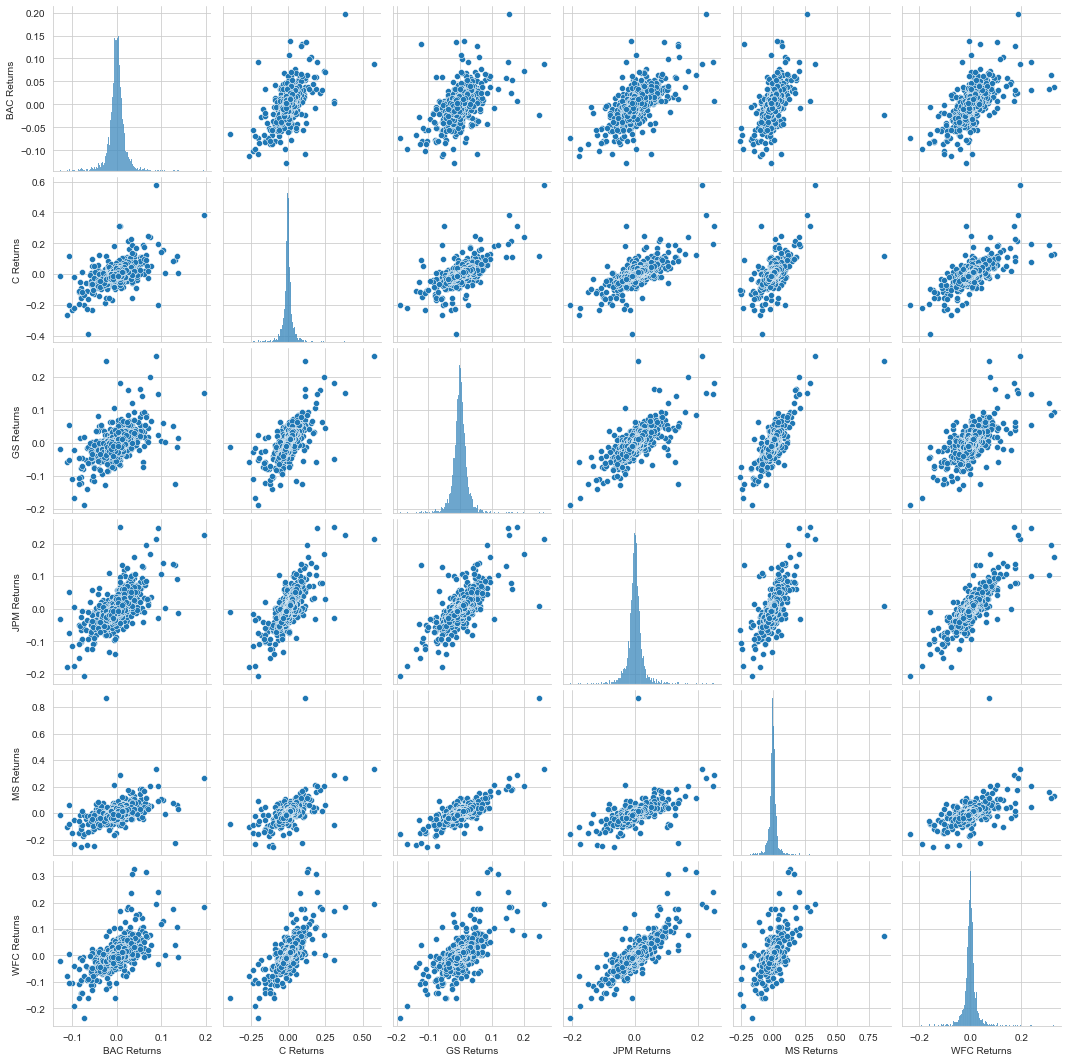

In [43]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

**When does each bank stock has the best and worst single day returns?**. 

In [44]:
# Worst Drop
returns.idxmin()

BAC Returns   2008-04-11
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

Note: 3 of the banks share the same day for the worst drop.

On further investigation (by which I mean google search) <br>
**2009-1-20** is (January 20th) the Inauguration day in the US.`

In [46]:
# Best Single Day Gain
returns.idxmax()

BAC Returns   2009-03-10
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

Note: Citi Group and Goldman Sachs Group share the date for best single day returns.

Reason: Unclear.

Background on [Citigroup's Stock Crash available here](https://en.wikipedia.org/wiki/Citigroup#Collapse_and_US_government_intervention_(2008))

**Which stock looks the riskiest over the entire time period?**

A quick look at the standard deviation of the returns should reveal this.

In [47]:
returns.std()

BAC Returns    0.019775
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

Citigroup looks the riskiest and Morgan Stanley is a close second.

**Which looks the riskiest for the year 2015?**

In [48]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.014076
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

Very similar risk profiles, but Morgan Stanley is the riskiest while Citigroup is the second riskiest.

**Exploring return in 2015 for Morgan Stanley**

<AxesSubplot:xlabel='MS Returns', ylabel='Count'>

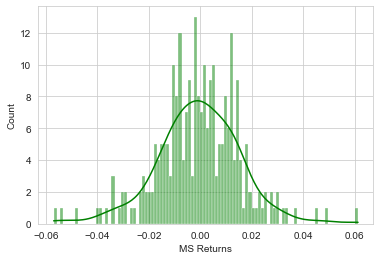

In [50]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],color='green',bins=100,kde=True)

**Looking into return in 2008 for CitiGroup**

<AxesSubplot:xlabel='C Returns', ylabel='Count'>

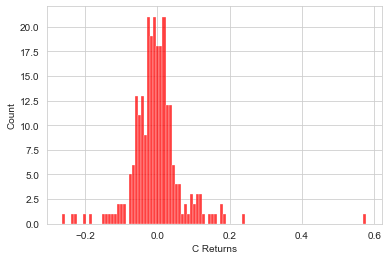

In [51]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'],color='red',bins=100)

____
## More Visualization

A lot of this project focuses on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the plots as described, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Additional Import for Visulaization

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time.**

Using a for loop will get all the banks.

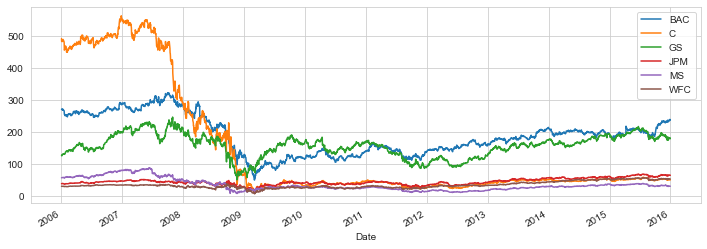

In [53]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

Clearly late 2008 is when the stocks take a significant fall.

Alternate to using for loops, using [cross-sections - .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) should also the trick.

```python
    bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
```

### Imports for plotly

Plotly does interactive plots.

In [92]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()


In [91]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Analysing the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

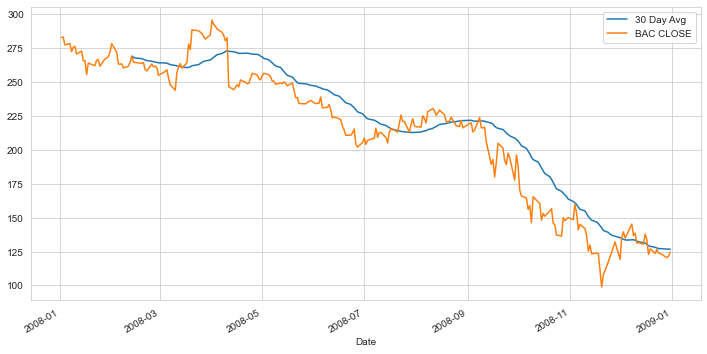

In [58]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Creating a heatmap of the correlation between the stocks' Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

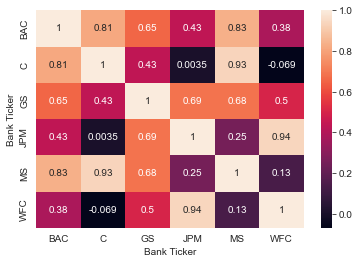

In [59]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Creating a clustermap to cluster the correlations together**

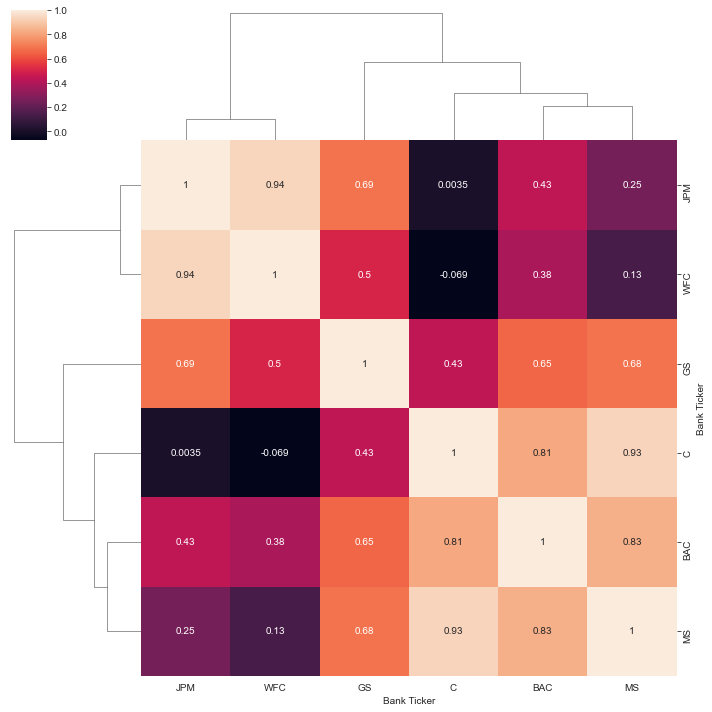

In [60]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [61]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

## Technical Analysis plots

In this section of the project cufflinks library is ued to create some Technical Analysis plots.

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [73]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [82]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [63]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')